<a href="https://colab.research.google.com/github/ngkarthi71/colon-cancer-analysis/blob/final-_task-_one/Final_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the given Data Set

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!ls /content/drive/'My Drive'/CML-Assignment2/

cell_model_VGG_3	     Image_classification_data.zip  model_VGG_3
colon_cancer_analysis.ipynb  latest.ipynb		    task1.ipynb


In [58]:
!cp /content/drive/'My Drive'/CML-Assignment2/Image_classification_data.zip .
!unzip -q -o Image_classification_data.zip
!rm Image_classification_data.zip
!ls

data_labels_extraData.csv  detect_cancer  __MACOSX   model_VGG_3   sample_data
data_labels_mainData.csv   drive	  model.png  patch_images


# Importing the needed Packages

In [59]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2 as cv

import IPython.display as display
from PIL import Image
from sklearn.model_selection import GridSearchCV

from skimage.transform import resize
from skimage.io import imread
import warnings;
warnings.simplefilter('ignore')


# Loading the Data set 

In [60]:
cancer=pd.read_csv('data_labels_mainData.csv')

In [61]:
cancer.head(5)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


# Data Exploration

In [62]:
cancer.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [63]:
cancer.isnull().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

In [64]:
cancer.isCancerous.value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

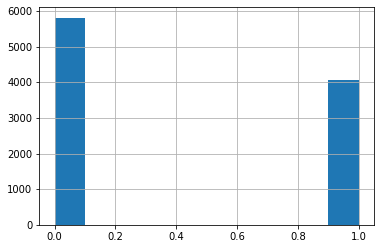

In [65]:
cancer.isCancerous.hist()
plt.show()

## Stochastic Gradient Descent model - Traditional machine learning algorithm

Data Reshaping :flattening images into image array in order to proceed with the algorithm

In [66]:
flat_data_arr=[]
target_arr=[]

for img in cancer['ImageName']:
    path = "/content/patch_images/" + img
    image_arr = cv.imread(path)
    #print(image_arr)
    img_resized=resize(image_arr,(27, 27, 3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(cancer.loc[cancer['ImageName'] == img].isCancerous)
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data_arr)
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,Target
0,0.929412,0.835294,0.949020,0.913725,0.819608,0.937255,0.898039,0.803922,0.921569,0.890196,0.792157,0.913725,0.929412,0.827451,0.949020,0.945098,0.839216,0.960784,0.941176,0.831373,0.956863,0.925490,0.811765,0.941176,0.905882,0.784314,0.917647,0.886275,0.764706,0.894118,0.858824,0.733333,0.870588,0.858824,0.737255,0.874510,0.854902,0.733333,0.874510,0.854902,...,0.803922,0.647059,0.843137,0.847059,0.690196,0.886275,0.909804,0.749020,0.937255,0.925490,0.760784,0.949020,0.909804,0.745098,0.933333,0.921569,0.756863,0.949020,0.945098,0.780392,0.972549,0.941176,0.776471,0.972549,0.913725,0.745098,0.941176,0.874510,0.705882,0.901961,0.760784,0.592157,0.788235,0.686275,0.517647,0.709804,0.745098,0.576471,0.764706,0
1,0.827451,0.686275,0.866667,0.827451,0.686275,0.878431,0.858824,0.721569,0.913725,0.854902,0.717647,0.901961,0.921569,0.784314,0.964706,1.000000,0.858824,1.000000,0.925490,0.776471,0.949020,0.894118,0.733333,0.905882,0.847059,0.682353,0.854902,0.874510,0.705882,0.874510,0.890196,0.733333,0.890196,0.870588,0.729412,0.878431,0.803922,0.682353,0.815686,0.850980,...,0.898039,0.784314,0.984314,0.925490,0.811765,0.992157,0.901961,0.811765,0.984314,0.866667,0.796078,0.960784,0.894118,0.819608,0.976471,0.945098,0.866667,1.000000,0.972549,0.886275,1.000000,0.949020,0.858824,0.980392,0.921569,0.831373,0.952941,0.937255,0.843137,0.968627,0.905882,0.811765,0.941176,0.933333,0.835294,0.968627,0.956863,0.858824,0.992157,0
2,0.968627,0.952941,0.968627,0.964706,0.949020,0.972549,0.956863,0.937255,0.968627,0.945098,0.917647,0.960784,0.949020,0.909804,0.960784,0.952941,0.894118,0.956863,0.933333,0.858824,0.933333,0.905882,0.815686,0.898039,0.854902,0.737255,0.835294,0.827451,0.686275,0.796078,0.815686,0.650980,0.772549,0.807843,0.623529,0.756863,0.776471,0.584314,0.725490,0.772549,...,0.713725,0.462745,0.647059,0.705882,0.435294,0.627451,0.721569,0.443137,0.639216,0.717647,0.431373,0.631373,0.705882,0.415686,0.619608,0.682353,0.384314,0.592157,0.584314,0.290196,0.498039,0.619608,0.325490,0.537255,0.643137,0.356863,0.568627,0.619608,0.341176,0.552941,0.686275,0.419608,0.635294,0.784314,0.529412,0.745098,0.764706,0.529412,0.745098,0
3,0.949020,0.949020,0.952941,0.945098,0.945098,0.952941,0.945098,0.945098,0.952941,0.949020,0.949020,0.952941,0.952941,0.949020,0.952941,0.956863,0.952941,0.956863,0.956863,0.952941,0.956863,0.956863,0.952941,0.956863,0.952941,0.949020,0.952941,0.952941,0.945098,0.952941,0.952941,0.945098,0.952941,0.956863,0.945098,0.952941,0.956863,0.945098,0.952941,0.960784,...,0.909804,0.858824,0.933333,0.886275,0.831373,0.909804,0.913725,0.858824,0.937255,0.956863,0.898039,0.976471,0.949020,0.890196,0.972549,0.937255,0.866667,0.952941,0.913725,0.831373,0.929412,0.945098,0.850980,0.952941,0.960784,0.850980,0.960784,0.949020,0.827451,0.945098,0.956863,0.827451,0.949020,0.988235,0.854902,0.972549,0.866667,0.729412,0.847059,0
4,0.741176,0.509804,0.741176,0.721569,0.494118,0.729412,0.717647,0.494118,0.733333,0.729412,0.509804,0.745098,0.776471,0.568627,0.792157,0.784314,0.603922,0.811765,0.788235,0.627451,0.823529,0.756863,0.580392,0.788235,0.662745,0.458824,0.686275,0.721569,0.501961,0.713725,0.874510,0.650980,0.839216,0.850980,0.627451,0.803922,0.878431,0.650980,0.835294,0.858824,...,0.960784,0.929412,0.964706,0.976471,0.952941,0.984314,0.972549,0.949020,0.976471,0.964706,0.945098,0.972549,0.952941,0.933333,0.960784,0.952941,0.933333,0.960784,0.949020,0.937255,0.956863,0.941176,0.937255,0.952941,0.937255,0.933333,0.949020,0.941176,0.937255,0.952941,0.945098,0.937255,0.952941,0.949020,0.937255,0.956863,0.956863,0.941176,0.956863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Test -Train split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

## Building an image classfier model using SGDClassifier

In [69]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.71504358, 0.84350133, 0.85633055])

In [71]:
score = sgd_clf.score(x_test, y_test)
score

0.8570707070707071

## Fine tuning the model in order to get better accuracy

In [72]:
sgd_clf = SGDClassifier(loss='log', random_state=42, 
                        penalty='l2', alpha=1e-4)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [73]:
cross_val_score(sgd_clf, x_train, y_train, cv=7, scoring='accuracy')

array([0.84969054, 0.74889478, 0.78868258, 0.84261715, 0.84350133,
       0.85057471, 0.83362832])

In [74]:
score = sgd_clf.score(x_test, y_test)
score

0.7141414141414142

# Classic Neural Network Model

### Randomly split the given data set

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train_data, test_data = train_test_split(cancer, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


# Model development

In [77]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [78]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

In [79]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.5.0'

In [80]:


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2187)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               560128    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


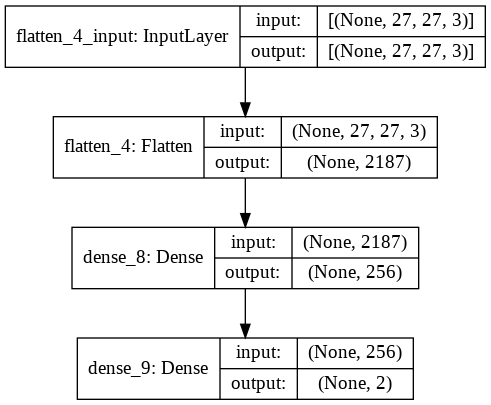

In [82]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [83]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [84]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

In [85]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='/content/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='/content/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [86]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


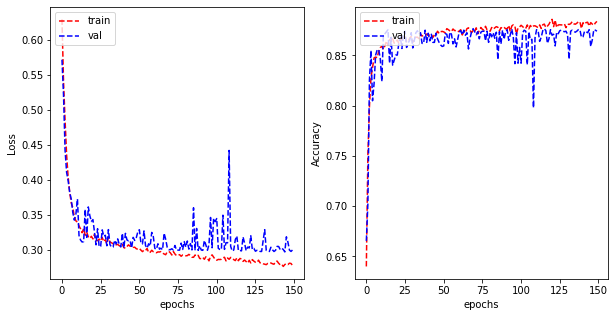

In [87]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [88]:
model.save("detect_cancer")

INFO:tensorflow:Assets written to: detect_cancer/assets


# Evaluating the Trained Model

In [89]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='/content/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
model.evaluate(test_generator)

1980/1980 [==============================] - 5s 2ms/step - loss: 0.3061 - categorical_accuracy: 0.8753


[0.30613720417022705, 0.8752525448799133]

In [91]:
label_names = {'cancer' : 0, 'noCancer' : 1}

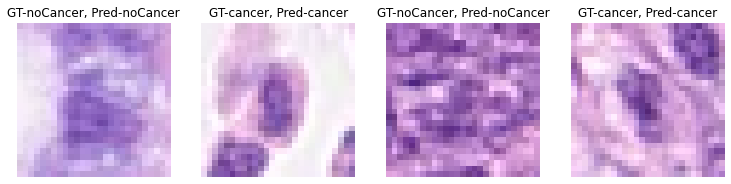

In [92]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# Convolutional Neural Network

In [131]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='/content/patch_images',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='/content/patch_images',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27,27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [132]:


model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [133]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [134]:
history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


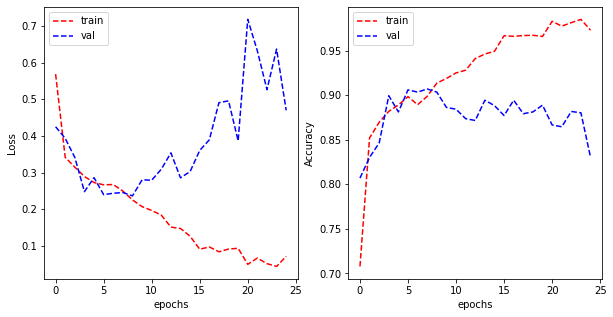

In [135]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

# Overfitting

## Apply Regularisation

In [136]:
reg_lambda = 0.001

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [137]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


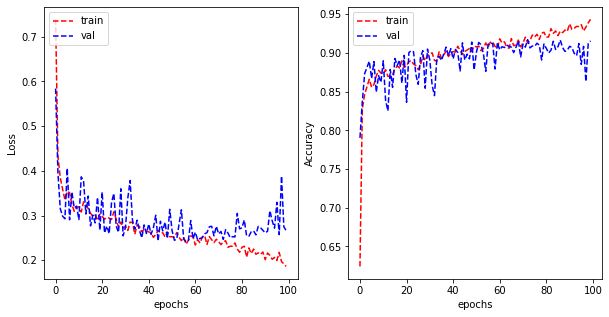

In [138]:
history_VGG_2 = model_VGG_2.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'], 
                    history_VGG_2.history['categorical_accuracy'], history_VGG_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Data Augmentation

In [139]:

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='/content/patch_images',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='/content/patch_images',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [140]:
reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [141]:
model_VGG_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


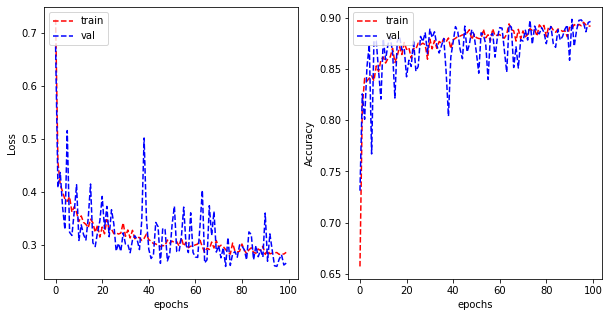

In [142]:
history_VGG_3 = model_VGG_3.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3.history['loss'], history_VGG_3.history['val_loss'], 
                    history_VGG_3.history['categorical_accuracy'], history_VGG_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

### Save the Model



In [143]:
model_VGG_3.save("model_VGG_3")

INFO:tensorflow:Assets written to: model_VGG_3/assets


In [144]:
!cp -R ./model_VGG_3 /content/drive/'My Drive'/CML-Assignment2/

## Testing the Model we have created finally

In [145]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='/content/patch_images',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
model_VGG_3.evaluate(test_generator)

1980/1980 [==============================] - 6s 3ms/step - loss: 0.2787 - categorical_accuracy: 0.8970


[0.27874860167503357, 0.8969696760177612]

## Plotting our Final Results

In [147]:
label_names = {'cancer' : 0, 'noCancer' : 1}

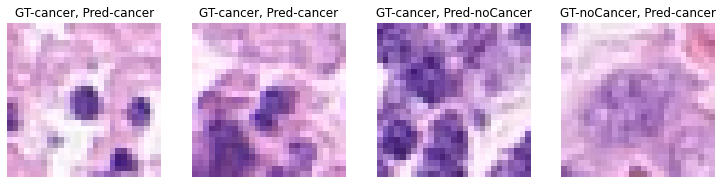

In [148]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_3.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')